# **Case Study: Advanced Analysis of Data Analyst Job Listings in India**

### Data Importing and Description

In [47]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [48]:
# Load the dataset
df = pd.read_csv("/content/dataAnalystJobsIndia_7th_July_2024.csv")

In [49]:
df

,Unnamed: 0,job_title,company,experience,min exp,max exp,salary,base salary,max salary,location,jobListed(days ago),postedIn,rating,reviews count,details,salary data provide by
0,0,JP Morgan Chase - Client Data Analyst (4-8 yrs),JP Morgan Chase,4-8 Yrs,4.0,8.0,NaN,NaN,NaN,Hyderabad / Secunderabad,3.0,iimjobs,4.1,5300.0,"Banking, KYC, Banking Operations",NaN
1,1,Data Analyst - Bangalore,Schneider Electric,5-10 Yrs,5.0,10.0,₹ 8 - 16L/yr,800000.0,1600000.0,"Bangalore / Bengaluru, Bangalore Rural",4.0,Naukri,4.2,3500.0,"ERP, SAP, Data Analysis",Salary Listed by Company
2,2,Senior IT ATLAS Data Analyst and Integration S...,SAP Labs India Pvt. Ltd.,7-11 Yrs,7.0,11.0,NaN,NaN,NaN,Bangalore / Bengaluru,7.0,Naukri,4.3,1500.0,"data quality, Data analysis, quality management",NaN
3,3,Consultant Data Analyst,Pfizer,2-6 Yrs,2.0,6.0,NaN,NaN,NaN,Mumbai,3.0,Naukri,4.1,1700.0,"Power Bi, Commercial Operations, Data Management",NaN
4,4,Senior Data Analyst - Retail Liabilities,IDFC FIRST Bank,5-10 Yrs,5.0,10.0,NaN,NaN,NaN,Mumbai,5.0,Naukri,4.5,2300.0,"Test strategy, Analytical, Manager Technology",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556,1556,Data Analyst / Sr. Data Analyst,CoreInsightsAI,0-8 Yrs,0.0,8.0,NaN,NaN,NaN,Remote,150.0,Naukri,NaN,NaN,"Data analysis, Analytical, Consulting",NaN
1557,1557,Artificial intelligence Architect,Cotocus.com,4-9 Yrs,4.0,9.0,NaN,NaN,NaN,Bangalore / Bengaluru,365.0,Naukri,NaN,NaN,"Cloud computing, Machine learning, Analytical",NaN
1558,1558,Data Analysts,Cotocus.com,1-4 Yrs,1.0,4.0,NaN,NaN,NaN,Bangalore / Bengaluru,365.0,Naukri,NaN,NaN,"Analytical, Continuous improvement, Data Analyst",NaN
1559,1559,Data Architect,Cotocus.com,6-10 Yrs,6.0,10.0,NaN,NaN,NaN,Bangalore / Bengaluru,365.0,Naukri,NaN,NaN,"Scrum, Data analysis, Data management",NaN


In [50]:
df.describe()

,Unnamed: 0,min exp,max exp,base salary,max salary,jobListed(days ago),rating,reviews count
count,1561.0000,1527.000000,1527.000000,3.430000e+02,3.430000e+02,1561.000000,1124.000000,1124.000000
mean,780.0000,3.131631,6.555337,5.649980e+05,1.859911e+06,223.814222,3.799377,959.846975
std,450.7662,2.191749,3.199266,6.992511e+05,2.018750e+06,650.077316,0.740237,4198.153851
min,0.0000,0.000000,1.000000,9.400000e+03,7.000000e+04,0.000000,1.000000,1.000000
25%,390.0000,2.000000,4.000000,1.650000e+05,7.000000e+05,16.000000,3.500000,7.000000
50%,780.0000,3.000000,6.000000,3.600000e+05,1.330000e+06,30.000000,3.900000,30.000000
75%,1170.0000,4.000000,8.000000,7.000000e+05,2.458500e+06,240.000000,4.200000,242.500000
max,1560.0000,15.000000,30.000000,9.000000e+06,2.250000e+07,19710.000000,5.000000,41400.000000


In [51]:
print(df.columns.tolist())

['Unnamed: 0', 'job_title', 'company', 'experience', 'min exp', 'max exp', 'salary', 'base salary', 'max salary', 'location', 'jobListed(days ago)', 'postedIn', 'rating', 'reviews count', 'details', 'salary data provide by']


In [54]:
print(df.dtypes)

Unnamed: 0                  int64
job_title                  object
company                    object
experience                 object
min exp                   float64
max exp                   float64
salary                     object
base salary               float64
max salary                float64
location                   object
jobListed(days ago)       float64
postedIn                   object
rating                    float64
reviews count             float64
details                    object
salary data provide by     object
dtype: object


In [56]:
missing = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_summary = pd.DataFrame({
    "Missing Count": missing,
    "Missing %": missing_percent.round(2)
})
print(missing_summary)

                        Missing Count  Missing %
Unnamed: 0                          0       0.00
job_title                           0       0.00
company                             0       0.00
experience                         34       2.18
min exp                            34       2.18
max exp                            34       2.18
salary                           1218      78.03
base salary                      1218      78.03
max salary                       1218      78.03
location                           33       2.11
jobListed(days ago)                 0       0.00
postedIn                            0       0.00
rating                            437      27.99
reviews count                     437      27.99
details                            33       2.11
salary data provide by           1218      78.03


In [57]:
print(df.describe(include="number"))

       Unnamed: 0      min exp      max exp   base salary    max salary  \
count   1561.0000  1527.000000  1527.000000  3.430000e+02  3.430000e+02   
mean     780.0000     3.131631     6.555337  5.649980e+05  1.859911e+06   
std      450.7662     2.191749     3.199266  6.992511e+05  2.018750e+06   
min        0.0000     0.000000     1.000000  9.400000e+03  7.000000e+04   
25%      390.0000     2.000000     4.000000  1.650000e+05  7.000000e+05   
50%      780.0000     3.000000     6.000000  3.600000e+05  1.330000e+06   
75%     1170.0000     4.000000     8.000000  7.000000e+05  2.458500e+06   
max     1560.0000    15.000000    30.000000  9.000000e+06  2.250000e+07   

       jobListed(days ago)       rating  reviews count  
count          1561.000000  1124.000000    1124.000000  
mean            223.814222     3.799377     959.846975  
std             650.077316     0.740237    4198.153851  
min               0.000000     1.000000       1.000000  
25%              16.000000     3.500000

In [58]:
print(df.describe(include="object"))

           job_title       company experience         salary  \
count           1561          1561       1527            343   
unique           867          1073         95            255   
top     Data Analyst  Diverse Lynx    2-5 Yrs  ₹ 10 - 20L/yr   
freq             426            24        109              8   

                     location postedIn       details    salary data provide by  
count                    1528     1561          1528                       343  
unique                    194        5          1257                         2  
top     Bangalore / Bengaluru   Naukri  Data Analyst  Salary Listed by Company  
freq                      336     1236            20                       177  


In [59]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


### 1. DATA CLEANING AND PREPROCESSING

In [60]:
# Clean salary columns
def extract_salary_number(x):
    if pd.isna(x):
        return np.nan
    nums = re.findall(r"\d+\.?\d*", str(x).replace(",", ""))
    return float(nums[0]) if nums else np.nan

In [61]:
df["base_salary_num"] = df["base salary"].apply(extract_salary_number)
df["max_salary_num"] = df["max salary"].apply(extract_salary_number)

In [62]:
# Fixing column name
if "jobListed(days ago" in df.columns:
    df.rename(columns={"jobListed(days ago": "jobListed(days ago)"}, inplace=True)

In [63]:
# Cleaning experience values
def clean_experience(x):
    if pd.isna(x):
        return np.nan
    x = str(x)
    match = re.findall(r"(\d+)", x)
    if len(match) == 1:
        return int(match[0])
    elif len(match) == 2:
        return (int(match[0]) + int(match[1])) / 2
    return np.nan

In [64]:
df["exp_span"] = df["experience"].apply(clean_experience)

In [66]:
# Cleaning experience column (e.g., "4-8 Yrs" → 4, 8)
def clean_exp(x):
    nums = re.findall(r"\d+", str(x))
    if len(nums) == 2:
        return int(nums[0]), int(nums[1])
    return np.nan, np.nan

df["min_exp_clean"], df["max_exp_clean"] = zip(*df["experience"].map(clean_exp))
df["exp_mid"] = df[["min_exp_clean", "max_exp_clean"]].mean(axis=1)

In [67]:
# Cleaning reviews count
df["reviews_count_num"] = df["reviews count"].apply(lambda x: extract_salary_number(x))

In [68]:
# Standardize location
df["location_clean"] = df["location"].str.split(",").str[0].str.strip()

In [69]:
# Removeing rows where essential values are missing
df = df.dropna(subset=["rating", "reviews_count_num", "exp_mid"])

### 2. EXPLORATORY DATA ANALYSIS

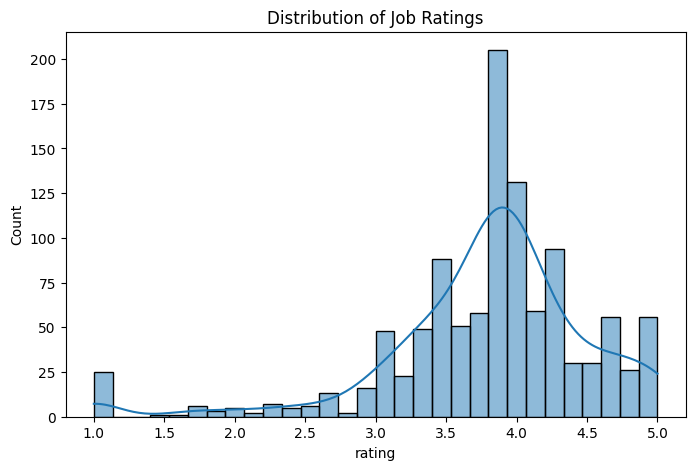

In [75]:
# Rating distribution
plt.figure(figsize=(8,5))
sns.histplot(df["rating"], kde=True)
plt.title("Distribution of Job Ratings")
plt.show()

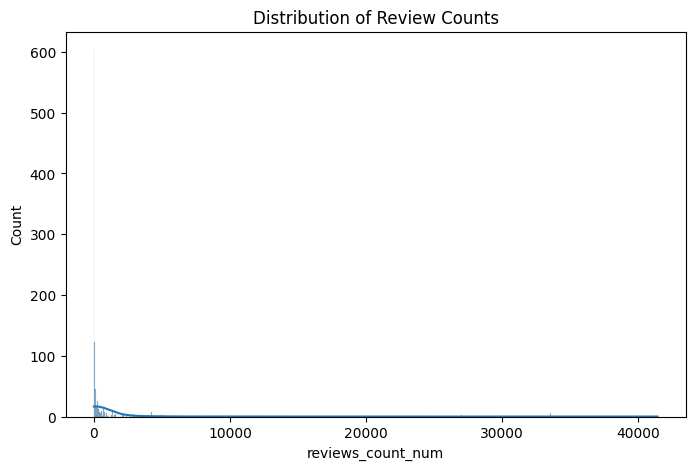

In [74]:
# Reviews count distribution
plt.figure(figsize=(8,5))
sns.histplot(df["reviews_count_num"], kde=True)
plt.title("Distribution of Review Counts")
plt.show()

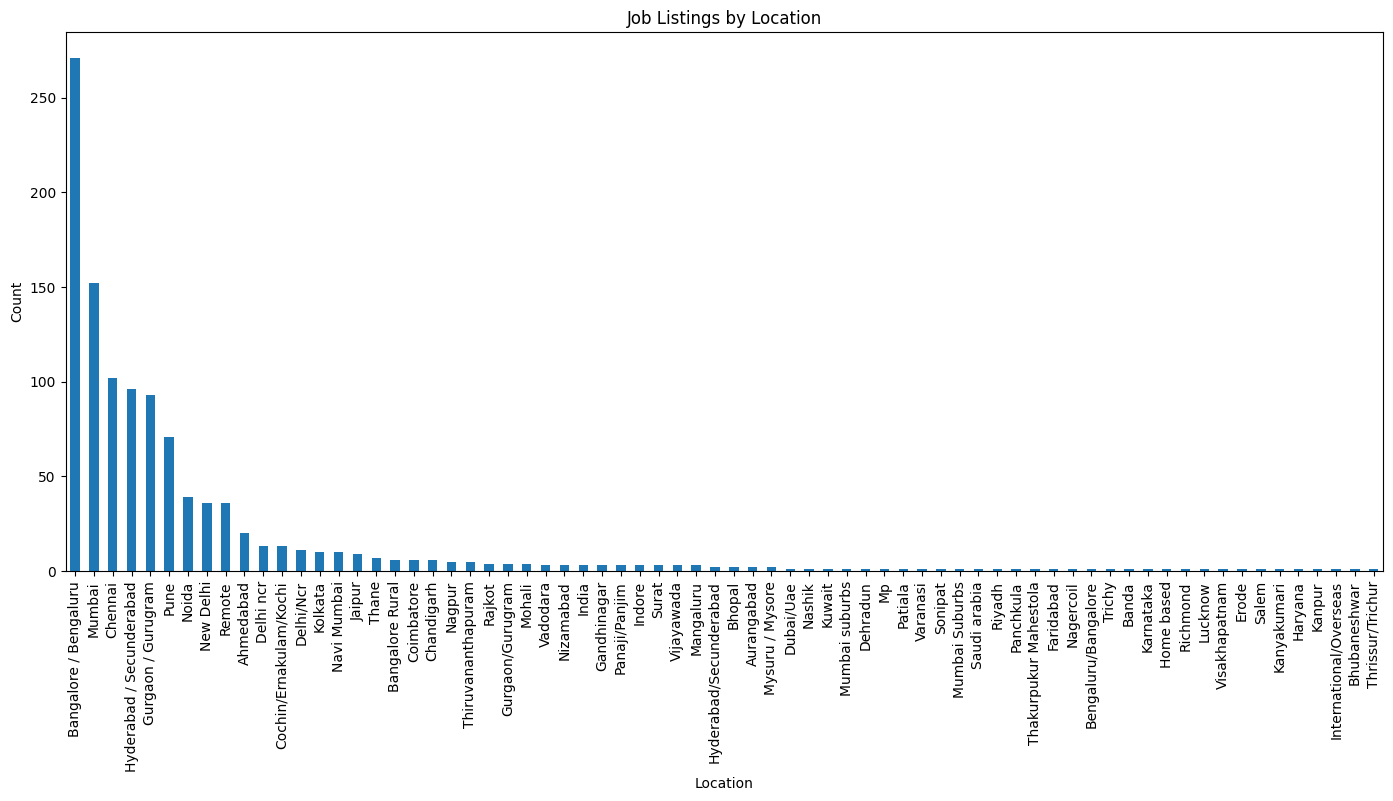

In [78]:
# Jobs by location
plt.figure(figsize=(17,7))
df["location_clean"].value_counts().plot(kind="bar")
plt.title("Job Listings by Location")
plt.xlabel("Location")
plt.ylabel("Count")
plt.show()

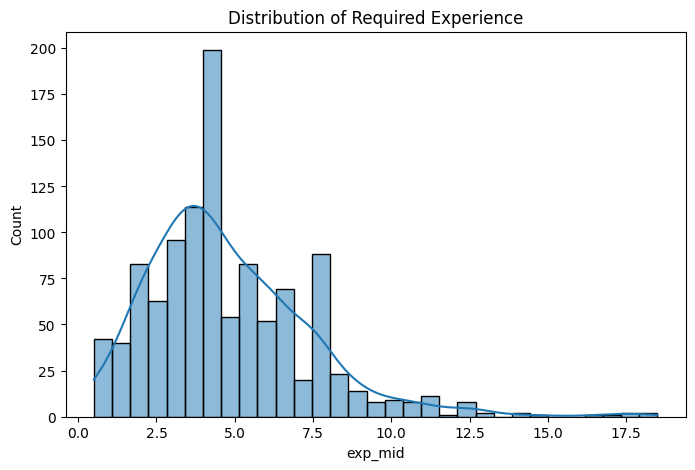

In [80]:
# Experience mid value distribution
plt.figure(figsize=(8,5))
sns.histplot(df["exp_mid"], kde=True)
plt.title("Distribution of Required Experience")
plt.show()

### 3. STATISTICAL ANALYSIS

In [81]:
print("Top locations:\n", df["location"].value_counts())
print("\nTop companies:\n", df["company"].value_counts())

Top locations:
 location
Bangalore / Bengaluru                                                                         251
Mumbai                                                                                        128
Gurgaon / Gurugram                                                                             92
Hyderabad / Secunderabad                                                                       88
Chennai                                                                                        60
                                                                                             ... 
Kanyakumari                                                                                     1
International/Overseas, Saudi arabia                                                            1
Bhubaneshwar                                                                                    1
New Delhi, Gurgaon/Gurugram                                                                  

In [82]:
# Correlation tests
clean_corr = df[["base salary", "reviews count"]].dropna()

if len(clean_corr) >= 2:
    pearson_r, pearson_p = stats.pearsonr(
        clean_corr["base salary"], clean_corr["reviews count"]
    )
    spearman_rho, spearman_p = stats.spearmanr(
        clean_corr["base salary"], clean_corr["reviews count"]
    )

    print("\nPearson:", pearson_r, pearson_p)
    print("Spearman:", spearman_rho, spearman_p)


Pearson: -0.056602251561984986 0.5240390644700293
Spearman: 0.09986305090907503 0.2601639763732011


In [83]:
# Comparing ratings on Naukri vs iimjobs
naukri = df[df["postedIn"] == "Naukri"]["rating"]
iim = df[df["postedIn"] == "iimjobs"]["rating"]

In [84]:
print("\nT-test: Naukri vs iimjobs ratings")
print(stats.ttest_ind(naukri, iim, nan_policy="omit"))


T-test: Naukri vs iimjobs ratings
TtestResult(statistic=np.float64(0.00047026436500566894), pvalue=np.float64(0.9996248840803188), df=np.float64(931.0))


In [85]:
# Correlation (ratings vs reviews count)
print("\nCorrelation (ratings vs reviews count)")
print(stats.pearsonr(df["rating"], df["reviews_count_num"]))


Correlation (ratings vs reviews count)
PearsonRResult(statistic=np.float64(0.019944431027834907), pvalue=np.float64(0.5095167744732034))


### 4. MACHINE LEARNING MODEL

In [86]:
# Keeping only rows where salary exists
ml_df = df.dropna(subset=["base_salary_num"])

In [89]:
if len(ml_df) < 5:
    print("\n❌ Not enough salary data to train ML model (need ≥ 5 rows).")
else:
    # Selecting features
    X = ml_df[["exp_mid", "rating", "reviews_count_num", "jobListed(days ago)"]]
    y = ml_df["base_salary_num"]

    # Handle remaining NaN
    X = X.fillna(X.mean())

    # Train-test splitting
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

In [90]:
    print("\nMODEL RESULTS")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R²:", r2_score(y_test, y_pred))


MODEL RESULTS
MAE: 293894.0
RMSE: 523202.39631273155
R²: 0.06289312512706535


In [91]:
    # Feature Importance
    feat_imp = pd.DataFrame({
        "Feature": X.columns,
        "Importance": model.feature_importances_
    }).sort_values(by="Importance", ascending=False)

    print("\nFEATURE IMPORTANCE")
    print(feat_imp)


FEATURE IMPORTANCE
               Feature  Importance
0              exp_mid    0.469268
2    reviews_count_num    0.210463
3  jobListed(days ago)    0.183646
1               rating    0.136624


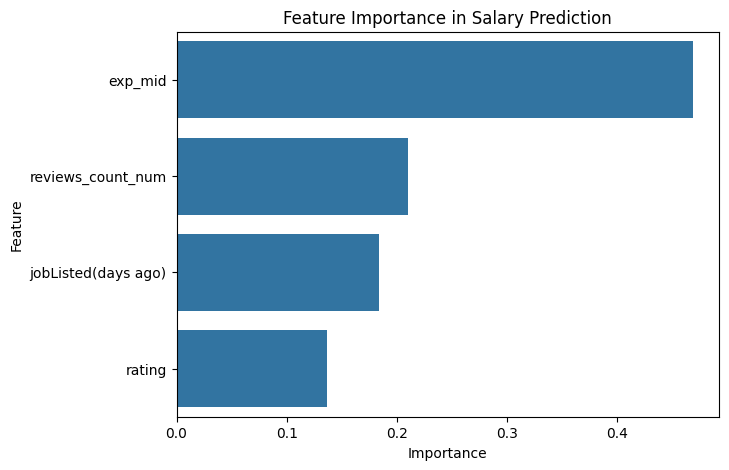

In [93]:
    # Plot feature importance
    plt.figure(figsize=(7,5))
    sns.barplot(data=feat_imp, x="Importance", y="Feature")
    plt.title("Feature Importance in Salary Prediction")
    plt.show()

In [ ]:
# ANALYSIS BY MD RIYAZ UDDIN.

**ANALYSIS BY MD RIYAZ UDDIN.**

**THANK YOU...**